Classification

In [1]:
import numpy as np
import pandas as pd
import sklearn.neural_network as nn
from sklearn.model_selection import train_test_split, cross_validate, RepeatedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

rng = np.random.RandomState(0)
path = u"midterm_hw_dataset/classification/train/3_train_classification.csv"
df = pd.read_csv(path)
m, n = df.shape
X = df.iloc[:, 0 : n - 1]
Y = df.iloc[:, n - 1]
X_type = list(X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

steps = [
	('scaler', StandardScaler()), 
	('classifier', nn.MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 3), random_state=rng, early_stopping=False, momentum=0.9, verbose=1))
]
clf_pipe = Pipeline(steps=steps)

params = {
	# 'classifier__max_iter': [200, 500, 1000, 1500, 2000],
	# 'classifier__activation' : ['identity', 'sigmoid', 'tanh', 'relu'],
	'classifier__activation': ['relu'], # 'identity'
	'classifier__solver': ['sgd'], 
	'classifier__alpha': [1e-5], # np.logspace(-5, 1, 7), # 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10
	'classifier__learning_rate_init': np.linspace(0.001, 0.015, 15),
	'classifier__tol': [1e-8], # np.logspace(-8, -4, 5),
	# 'classifier__momentum': np.linspace(0.7, 0.9, 21),
	'classifier__hidden_layer_sizes': [(5,3)],
	# 'classifier__hidden_layer_sizes': [(3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,)]
	# 'classifier__hidden_layer_sizes': [(3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,),
	# 								(3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2),
	# 								(3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3),
	# 								(3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4), (10, 4), (11, 4), (12, 4), (13, 4)]
	}
grid = GridSearchCV(clf_pipe,  params, scoring='accuracy', n_jobs=8, cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=rng), return_train_score=True)
grid.fit(X, Y)
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.to_csv("grid_classifier_results.csv")
print(grid_results)
print("\nBest Params:\n", grid.best_params_)
print("\nBest Score:\n", grid.best_score_)
import joblib
joblib.dump(grid, "Grid_classifier.pkl")
joblib.dump(grid.best_estimator_, "BestClassifier.pkl")

Iteration 1, loss = 1.30754766
Iteration 2, loss = 1.30467584
Iteration 3, loss = 1.30056534
Iteration 4, loss = 1.29510781
Iteration 5, loss = 1.28822208
Iteration 6, loss = 1.28029002
Iteration 7, loss = 1.27134261
Iteration 8, loss = 1.26133661
Iteration 9, loss = 1.24989150
Iteration 10, loss = 1.23707613
Iteration 11, loss = 1.22258082
Iteration 12, loss = 1.20645210
Iteration 13, loss = 1.18875335
Iteration 14, loss = 1.16968755
Iteration 15, loss = 1.14784424
Iteration 16, loss = 1.12380455
Iteration 17, loss = 1.09800069
Iteration 18, loss = 1.06911769
Iteration 19, loss = 1.03922874
Iteration 20, loss = 1.00936330
Iteration 21, loss = 0.97974778
Iteration 22, loss = 0.95050338
Iteration 23, loss = 0.92248501
Iteration 24, loss = 0.89558599
Iteration 25, loss = 0.87029879
Iteration 26, loss = 0.84683630
Iteration 27, loss = 0.82552452
Iteration 28, loss = 0.80628168
Iteration 29, loss = 0.78871335
Iteration 30, loss = 0.77271269
Iteration 31, loss = 0.75793216
Iteration 32, los

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


['BestClassifier.pkl']

分类器超参数的确定

0.9375


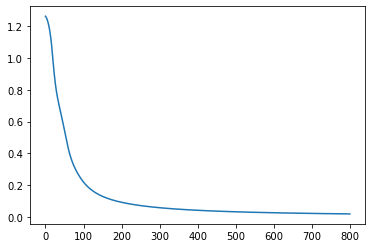

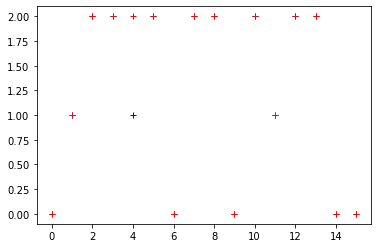

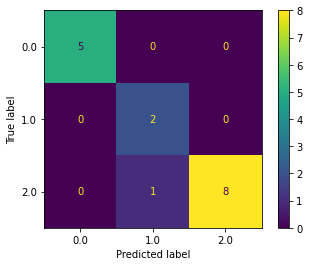

Times 1:
   fit_time  score_time  test_accuracy  train_accuracy  test_neg_log_loss  \
0  0.281000    0.003999        0.93750        0.984375          -0.083018   
1  0.291558    0.004002        0.90625        1.000000          -0.453981   
2  0.274399    0.003028        1.00000        0.992188          -0.008396   
3  0.257996    0.002999        0.96875        0.984375          -0.076209   
4  0.264798    0.004001        0.93750        1.000000          -0.395948   

   train_neg_log_loss  
0           -0.025497  
1           -0.004920  
2           -0.024652  
3           -0.025258  
4           -0.007049  
Train Log Loss Mean:  0.017474961115484584
Test Log Loss Mean:  0.20351041504303286
Train Accuracy Mean:  0.9921875
Test Accuracy Mean:  0.95

Estimator Loss:  0.01751493753714674
Times 2:
   fit_time  score_time  test_accuracy  train_accuracy  test_neg_log_loss  \
0  0.266831    0.003000        0.90625        0.992188          -0.149603   
1  0.278620    0.003999        0.93750   

['BestClassifier_Sun Nov 21 16_20_41 2021_acc_1.0.pkl']

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import joblib, time
import sklearn
import sklearn.neural_network as nn
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

rng = np.random.RandomState(0)
path = u"midterm_hw_dataset/classification/train/3_train_classification.csv"
df = pd.read_csv(path)
m, n = df.shape
X = df.iloc[:, 0 : n - 1]
Y = df.iloc[:, n - 1]
X_type = list(X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

warnings.filterwarnings('ignore', category=Warning, module='sklearn')

steps = [
	('scaler', StandardScaler()), 
	('classifier', nn.MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 3), random_state=rng,\
	early_stopping=False, activation='relu', learning_rate_init=0.007, tol=1e-08, max_iter=800, verbose=0))
]
clf_pipe = Pipeline(steps=steps)
clf_pipe.fit(X_train, Y_train)
acc = clf_pipe.score(X_test, Y_test)
print(acc)
plt.plot(clf_pipe[1].loss_curve_)
plt.show()
Y_pred = clf_pipe.predict(X_test)
plt.plot(np.arange(len(Y_test)), Y_pred, 'b+', np.arange(len(Y_test)), Y_test, 'r+')
plt.show()

cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred, labels=clf_pipe[1].classes_), display_labels=clf_pipe[1].classes_)
cm.plot()
plt.show()

# Five times CV
cv_results_dict={}
estimator_dict = {}
scoring_dict={}
best_test_acc = acc
best_estimator = clf_pipe

for i in range(5):
	print("Times %d:" % (i + 1))
	cv_results = cross_validate(clf_pipe, X, Y, cv=KFold(n_splits=5, shuffle=True, random_state=i), scoring=['accuracy', 'neg_log_loss'], return_train_score=True, return_estimator=True)
	cv_results = pd.DataFrame(cv_results)
	cv_results_dict[i] = cv_results
	estimators = cv_results['estimator']
	estimator_dict[i] = estimators
	
	train_logloss_mean = cv_results['train_neg_log_loss'].mean() * (-1.0)
	test_logloss_mean = cv_results['test_neg_log_loss'].mean() * (-1.0)
	train_acc_mean = cv_results['train_accuracy'].mean()
	test_acc_mean = cv_results['test_accuracy'].mean()
	scoring_dict[i] = {'train_logloss_mean': train_logloss_mean,
						'test_logloss_mean': test_logloss_mean,
						'train_acc_mean': train_acc_mean,
						'test_acc_mean': test_acc_mean}
	print(cv_results.drop(columns=['estimator']))
	
	current_smallest_test_acc = np.max(cv_results['test_accuracy'])
	if current_smallest_test_acc > best_test_acc:
		current_smallest_test_acc_idx = np.argmax(cv_results['test_accuracy'])
		current_smallest_estimator = estimators[current_smallest_test_acc_idx]
		best_estimator = current_smallest_estimator
		best_test_acc = current_smallest_test_acc
	
	print("Train Log Loss Mean: ", train_logloss_mean)
	print("Test Log Loss Mean: ", test_logloss_mean)
	print("Train Accuracy Mean: ", train_acc_mean)
	print("Test Accuracy Mean: ", test_acc_mean)
	
	loss_list = []
	for est in estimators:
		loss_list.append(est[1].loss_)
	estimator_loss_mean = np.array(loss_list).mean()
	
	print("\nEstimator Loss: ", estimator_loss_mean)

print("Best Test Accuracy: ", best_test_acc)

date = time.asctime()
date = date.replace(":", "_")
best_estimator.fit(X, Y)
acc = best_estimator.score(X, Y)
joblib.dump(best_estimator, f"BestClassifier_{date}_acc_{acc}.pkl")

运用MLP多层感知机作为分类器，五折交叉验证损失和准确率

导出上述测试最好情况下的pkl文件

In [6]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score

path = u"3_test_classification.csv"    #测试接口，此处放置测试文件路径
df = pd.read_csv(path)
m, n = df.shape
X = df.iloc[:, 0 : n - 1]
Y = df.iloc[:, n - 1]

reg = joblib.load("BestClassifier_Sun Nov 21 16_20_41 2021_acc_1.0.pkl")
print(accuracy_score(Y, reg.predict(X)))

1.0


以上是测试程序

clf = joblib.load("BestClassifier_Sun Nov 21 16_20_41 2021_acc_1.0.pkl") # 此为模型加载步骤

以下为测试函数：

In [8]:
def ClassifierTestXY(modelpath, X_test, Y_test):
	"""
	Classifier Test Interface
	
	===================================
	Input:
	===================================
	modelpath: Model File's Path (.pkl)
	X_test: Test Data of X Columns, shape: (m, n) of np.ndarray / pd.DataFrame
	Y_test: Test Data of Y Columns, shape: (m,) of np.ndarray / pd.Series
	
	===================================
	Internal Dataset Variables (for debug use)
	===================================
	estimator: Pipeline or estimators implemented :meth: predict
	Y_pred: predictions from X_test with the estimator inputed, shape: (m,)
	
	===================================
	Return:
	===================================
	acc: Accuracy
	"""
	
	import joblib
	estimator = joblib.load(modelpath)
	Y_pred = estimator.predict(X_test)
	from sklearn.metrics import accuracy_score
	acc = accuracy_score(Y_test, Y_pred)
	
	return acc

以下为用例：

In [9]:
import pandas as pd

path = u"3_test_classification.csv"    #测试接口，此处放置测试文件路径
df = pd.read_csv(path)
m, n = df.shape
X = df.iloc[:, 0 : n - 1]
Y = df.iloc[:, n - 1]

acc = ClassifierTestXY("BestClassifier_Sun Nov 21 16_20_41 2021_acc_1.0.pkl", X, Y)
print(acc)

1.0
